Author : Brillyando M.A.

Water-treatment clustering using PCA and KNN (from scratch)

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
data =  pd.read_csv('water-treatment.data')
data



,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6
0,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
522,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
523,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
524,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
attribute=["Date", "Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E", "COND-E",
              "PH-P", "DBO-P","SS-P", "SSV-P", "SED-P", "COND-P", "PH-D", "DBO-D", "DQO-D", "SS-D",
              "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S",
              "RD-DBO-P", "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"]
data =  pd.read_csv('water-treatment.data', names=attribute)


for i in data.columns:
  data[i].apply(str).str.replace('?', "")
  data[i] = data[i].apply(lambda x: np.nan if x == '?' else x)
  if(i!="Date"):
    data[i] = data[i].astype(float)
  print(i, data[i].isna().sum())

data=data.drop(columns=["Date"])
print(data.describe())
data

<ipython-input-64-64f1667a4f63>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[i].apply(str).str.replace('?', "")


Date 0
Q-E 18
ZN-E 3
PH-E 0
DBO-E 23
DQO-E 6
SS-E 1
SSV-E 11
SED-E 25
COND-E 0
PH-P 0
DBO-P 40
SS-P 0
SSV-P 11
SED-P 24
COND-P 0
PH-D 0
DBO-D 28
DQO-D 9
SS-D 2
SSV-D 13
SED-D 25
COND-D 0
PH-S 1
DBO-S 23
DQO-S 18
SS-S 5
SSV-S 17
SED-S 28
COND-S 1
RD-DBO-P 62
RD-SS-P 4
RD-SED-P 27
RD-DBO-S 40
RD-DQO-S 26
RD-DBO-G 36
RD-DQO-G 25
RD-SS-G 8
RD-SED-G 31
                Q-E        ZN-E        PH-E       DBO-E       DQO-E  \
count    509.000000  524.000000  527.000000  504.000000  521.000000   
mean   37226.567780    2.359065    7.810057  188.714286  406.898273   
std     6635.999806    2.749509    0.246175   62.062831  120.362974   
min    10050.000000    0.100000    6.900000   31.000000   81.000000   
25%    32888.000000    0.900000    7.600000  146.750000  325.000000   
50%    35990.000000    1.500000    7.800000  182.500000  400.000000   
75%    41372.000000    3.000000    8.000000  223.000000  478.000000   
max    60081.000000   33.500000    8.700000  438.000000  941.000000   

          

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894.0,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988.0,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060.0,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260.0,7.4,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
#zscore
for i in data.columns:
  data[i] = (data[i] - data[i].mean())/data[i].std(ddof=0)

#fill missing value
for col in data.columns:
  mean = data[col].mean()
  data[col] = data[col].fillna(mean)

print(data.isna().sum())
data

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64


,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1.036949,-0.312742,-0.040892,-1.233581e-16,0.000846,-0.452428,0.395605,-3.422745e-02,1.600361,0.308849,...,1.303571,1.528049e-17,0.021990,5.534798e-01,-1.513733e-16,0.188061,1.244535e-15,0.173808,-0.202515,1.153712e-01
1,0.271127,0.233332,-0.447493,-1.233581e-16,0.300229,-0.098997,0.629415,6.953768e-01,2.994449,-0.573338,...,2.826006,1.528049e-17,0.170540,4.751435e-01,-1.513733e-16,1.118613,1.244535e-15,0.185069,0.381876,2.052049e-01
2,-0.753840,0.961429,-0.854094,-1.233581e-16,1.007105,-0.305165,0.685852,-4.355098e-01,0.474952,-0.573338,...,1.014567,1.528049e-17,-0.024920,5.646707e-01,-1.513733e-16,-1.285314,1.244535e-15,-0.231594,-0.032067,-1.316717e-01
3,-0.332389,0.415356,0.365710,2.626676e-01,1.506076,-0.260986,0.339168,-3.422745e-02,2.411467,-0.132244,...,0.890708,-4.050742e-01,0.444185,5.310980e-01,4.379599e-01,0.386234,1.689845e-01,0.500382,0.077506,2.052049e-01
4,-0.045640,-0.312742,0.772311,8.594300e-01,0.740987,-0.378797,0.274669,-2.166285e-01,1.600361,0.308849,...,1.613219,1.528049e-17,0.326909,5.646707e-01,-1.513733e-16,0.274223,4.396209e-01,0.038674,-0.178165,9.291273e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,-0.679325,-0.800567,-0.447493,-1.543748e+00,-1.288163,-0.378797,-0.370324,-8.367921e-01,-1.481841,-0.573338,...,-1.426489,1.528049e-17,0.295635,3.072799e-01,-1.551759e+00,0.696418,-1.340881e+00,0.083718,0.929742,1.153712e-01
523,-0.556841,-0.742319,-0.040892,5.299434e-02,-0.506441,-0.408249,0.581041,-2.166285e-01,-1.243578,-0.132244,...,-1.405845,1.528049e-17,-0.017102,8.108707e-01,-5.094241e-02,-0.751108,2.971807e-01,-0.366728,0.211429,2.052049e-01
524,-0.649307,-0.749600,-1.667296,-8.018274e-01,-0.331802,-0.349344,0.242419,-5.814306e-01,-1.061080,-1.455524,...,-0.925892,1.528049e-17,0.506733,7.325343e-01,-8.240903e-01,-0.122123,-9.990250e-01,-0.085199,-0.007718,-1.937946e-02
525,-0.759723,-0.749600,-2.073898,1.820240e-01,1.148480,0.224982,0.298856,-2.166285e-01,-0.554139,-1.896618,...,-0.435616,4.833123e-02,0.577098,7.325343e-01,-1.987501e-01,0.265607,6.927641e-02,1.029656,0.065331,1.602881e-01


In [ ]:
#reduksi dimensi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
new_data = pd.DataFrame(data_pca, columns=['A1', "A2"])
new_data

,A1,A2
0,1.694128,0.398565
1,4.385168,0.496018
2,0.545752,1.187640
3,3.811259,0.306045
4,2.449081,0.334722
...,...,...
522,-4.104591,-0.816199
523,-2.145072,-0.381050
524,-3.038788,0.567751
525,-1.728211,-0.325233


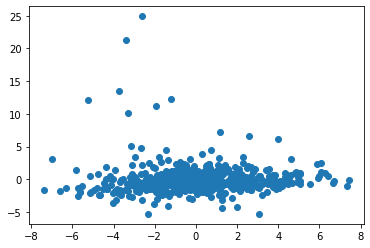

In [ ]:
plt.scatter(new_data['A1'], new_data['A2'])
plt.show()

In [ ]:
#Initial Centroid
def init_centr(data):
  rand_int = np.random.randint(0, high=2,size=4)
  rand_int_val = np.random.randint(0, high=526,size=4)
  init_centroid = []
  for i in range(4):
    for j in range(i,4):
      init_centroid.append(data.loc[rand_int_val[j]][rand_int[i]])
      break
  init_centroid = pd.DataFrame(init_centroid)
  return init_centroid



In [ ]:

def euclid_dist(x1,x2):
  return np.linalg.norm(np.array(x1) - np.array(x2))

cluster=[]
def find_minimum(centroid, data):
  min_centroid=[]
  for i in data:
    dist=0
    idx=0
    temp_arr=[]
    for c in centroid:
      dist = euclid_dist(i,c)
      temp_arr.append(dist)
    cluster.append(temp_arr)
    min_val = np.argmin(temp_arr)
    min_centroid.append(min_val)
  min_centroid = pd.DataFrame(min_centroid, columns=['idx_min'])
  return min_centroid




In [ ]:
#Clustering
def createCluster(arr_idx):

  cluster=[[] for i in range(4)]
  #print(cluster)
  np_idx = np.array(arr_idx)
  idx_current = 0

  for i in range(len(new_data)):
    if (np_idx[i][0] == 0 or np_idx[i][0] == 2):
      cluster[0].append(new_data.A1[i])
      cluster[2].append(new_data.A2[i])
    elif (np_idx[i][0] == 1 or np_idx[i][0] == 3):
      cluster[1].append(new_data.A1[i])
      cluster[3].append(new_data.A2[i])

    idx_current+=1
  c1 = {"C1_X1": cluster[0],
        "C1_X2": cluster[2]}
  c2 = {"C2_X1":cluster[1],
        "C2_X2":cluster[3]}
  cluster1 = pd.DataFrame(c1)
  cluster2 = pd.DataFrame(c2)
  return cluster1,cluster2


#print(c1)
#print(c2)

In [ ]:
def new_centroid(clust1, clust2):
  new_centr=[]
  new_centr.append(clust1.C1_X1.mean())
  new_centr.append(clust2.C2_X1.mean())
  new_centr.append(clust1.C1_X2.mean())
  new_centr.append(clust2.C2_X2.mean())
  new_centr=pd.DataFrame(new_centr)
  return new_centr
#print(c1.Cluster1_X1.mean())



In [ ]:
#main program
init_centroid = init_centr(new_data)
np_data=np.array(new_data)
centroid=np.array(init_centroid)
comp=pd.DataFrame([0.0] )
for i in range(100):
  print("iterasi ke",i)
  lst_idx = find_minimum(centroid, np_data)
  print(lst_idx)
  c1,c2=createCluster(lst_idx)
  print(c1)
  print(c2)
  centroid = new_centroid(c1,c2)
  if centroid.equals(comp):
    print("Proses berhenti")
    centroid = np.array(centroid)
    break
  comp=centroid
  centroid = np.array(centroid)
  print("Centroid:",centroid)
print("CENTROID AKHIR:\n",centroid)


iterasi ke 0
     idx_min
0          2
1          2
2          2
3          2
4          2
..       ...
522        1
523        1
524        1
525        1
526        1

[527 rows x 1 columns]
        C1_X1     C1_X2
0    1.694128  0.398565
1    4.385168  0.496018
2    0.545752  1.187640
3    3.811259  0.306045
4    2.449081  0.334722
..        ...       ...
271 -0.993394  1.185428
272  0.522198 -0.369393
273 -0.189387  0.140710
274  3.055936  0.567305
275 -0.897313  0.792243

[276 rows x 2 columns]
        C2_X1     C2_X2
0   -2.062081  1.898436
1    0.052152 -2.169969
2   -2.789650 -0.394572
3    0.010275 -0.351779
4   -0.095365 -0.053816
..        ...       ...
246 -4.104591 -0.816199
247 -2.145072 -0.381050
248 -3.038788  0.567751
249 -1.728211 -0.325233
250 -2.957473 -0.231423

[251 rows x 2 columns]
Centroid: [[ 1.58357053]
 [-1.74129667]
 [ 0.90264659]
 [-0.99255163]]
iterasi ke 1
     idx_min
0          2
1          0
2          2
3          0
4          0
..       ...
522     

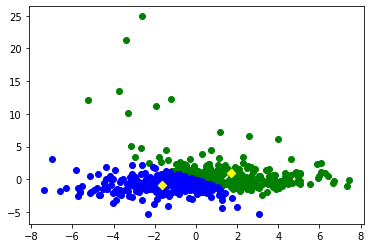

In [ ]:
plt.scatter(c1.C1_X1, c1.C1_X2, color = 'green', label ='Cluster 1')
plt.scatter(c2.C2_X1, c2.C2_X2, color = 'blue', label = 'Cluster 2')
plt.scatter(centroid[0][0], centroid[2][0], color = 'yellow', marker="D", label = 'Centroid')
plt.scatter(centroid[1][0], centroid[3][0], color = 'yellow', marker="D")
plt.show()